In [14]:
# importar pandas e tabelas
import pandas as pd
spotify = pd.read_csv('/content/track_in_spotify - spotify.csv')
competition = pd.read_csv('/content/track_in_competition - competition.csv')
technical = pd.read_csv('/content/track_technical_info - technical_info.csv')

In [15]:
# Unir os DataFrames usando o track_id como chave de junção
merged = pd.merge(spotify, competition, on='track_id')
merged = pd.merge(merged, technical, on='track_id')

In [16]:
# Remover linhas com valores não numéricos na coluna streams
merged = merged[pd.to_numeric(merged['streams'], errors='coerce').notnull()]

# Converter a coluna streams para int64
merged['streams'] = merged['streams'].astype(int)

# Converter a coluna deezer playlists para int64
merged['in_deezer_playlists'] = merged['in_deezer_playlists'].str.replace(',', '').astype(int)

<ipython-input-16-5de4f5e57fbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['streams'] = merged['streams'].astype(int)
<ipython-input-16-5de4f5e57fbc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['in_deezer_playlists'] = merged['in_deezer_playlists'].str.replace(',', '').astype(int)


In [17]:
# Somar as colunas de playlists
merged['total_playlists'] = merged['in_spotify_playlists'] + merged['in_apple_playlists'] + merged['in_deezer_playlists']

# Remover colunas foro escopo
merged = merged.drop(['released_month', 'released_day', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'key', 'mode', 'in_shazam_charts'], axis=1)

# Verificar se as colunas foi eliminada com sucesso
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_id            952 non-null    object
 1   track_name          952 non-null    object
 2   artist(s)_name      952 non-null    object
 3   artist_count        952 non-null    int64 
 4   released_year       952 non-null    int64 
 5   in_spotify_charts   952 non-null    int64 
 6   streams             952 non-null    int64 
 7   in_apple_charts     952 non-null    int64 
 8   in_deezer_charts    952 non-null    int64 
 9   bpm                 952 non-null    int64 
 10  danceability_%      952 non-null    int64 
 11  valence_%           952 non-null    int64 
 12  energy_%            952 non-null    int64 
 13  acousticness_%      952 non-null    int64 
 14  instrumentalness_%  952 non-null    int64 
 15  liveness_%          952 non-null    int64 
 16  speechiness_%       952 non-nul

In [18]:
merged.describe()

artist_count  released_year  in_spotify_charts       streams  \
count    952.000000     952.000000         952.000000  9.520000e+02   
mean       1.556723    2018.288866          12.022059  5.141374e+08   
std        0.893331      11.011397          19.582405  5.668569e+08   
min        1.000000    1930.000000           0.000000  2.762000e+03   
25%        1.000000    2020.000000           0.000000  1.416362e+08   
50%        1.000000    2022.000000           3.000000  2.905309e+08   
75%        2.000000    2022.000000          16.000000  6.738690e+08   
max        8.000000    2023.000000         147.000000  3.703895e+09   

       in_apple_charts  in_deezer_charts         bpm  danceability_%  \
count       952.000000        952.000000  952.000000      952.000000   
mean         51.963235          2.669118  122.553571       66.984244   
std          50.628850          6.038152   28.069601       14.631282   
min           0.000000          0.000000   65.000000       23.000000   
25%           7.000000          0.000000   99.750000       57.000000   
50%          38.500000          0.000000  121.000000       69.000000   
75%          87.000000          2.000000  140.250000       78.000000   
max         275.000000         58.000000  206.000000       96.000000   

        valence_%    energy_%  acousticness_%  instrumentalness_%  liveness_%  \
count  952.000000  952.000000      952.000000          952.000000  952.000000   
mean    51.406513   64.274160       27.078782            1.582983   18.214286   
std     23.480526   16.558517       26.001599            8.414064   13.718374   
min      4.000000    9.000000        0.000000            0.000000    3.000000   
25%     32.000000   53.000000        6.000000            0.000000   10.000000   
50%     51.000000   66.000000       18.000000            0.000000   12.000000   
75%     70.000000   77.000000       43.000000            0.000000   24.000000   
max     97.000000   97.000000       97.000000           91.000000   97.000000   

       speechiness_%  total_playlists  
count     952.000000       952.000000  
mean       10.138655      5655.967437  
std         9.915399      8919.088432  
min         2.000000        34.000000  
25%         4.000000       914.500000  
50%         6.000000      2306.000000  
75%        11.000000      5995.250000  
max        64.000000     62623.000000

In [19]:
# Listar todas as colunas e seus tipos
print(merged.dtypes)

# Verificar se há colunas com valores não numéricos
non_numeric_columns = merged.select_dtypes(include=['object']).columns
print("Colunas não numéricas:", non_numeric_columns)


track_id              object
track_name            object
artist(s)_name        object
artist_count           int64
released_year          int64
in_spotify_charts      int64
streams                int64
in_apple_charts        int64
in_deezer_charts       int64
bpm                    int64
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
total_playlists        int64
dtype: object
Colunas não numéricas: Index(['track_id', 'track_name', 'artist(s)_name'], dtype='object')


['artist_count', 'released_year', 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'total_playlists', 'streams']


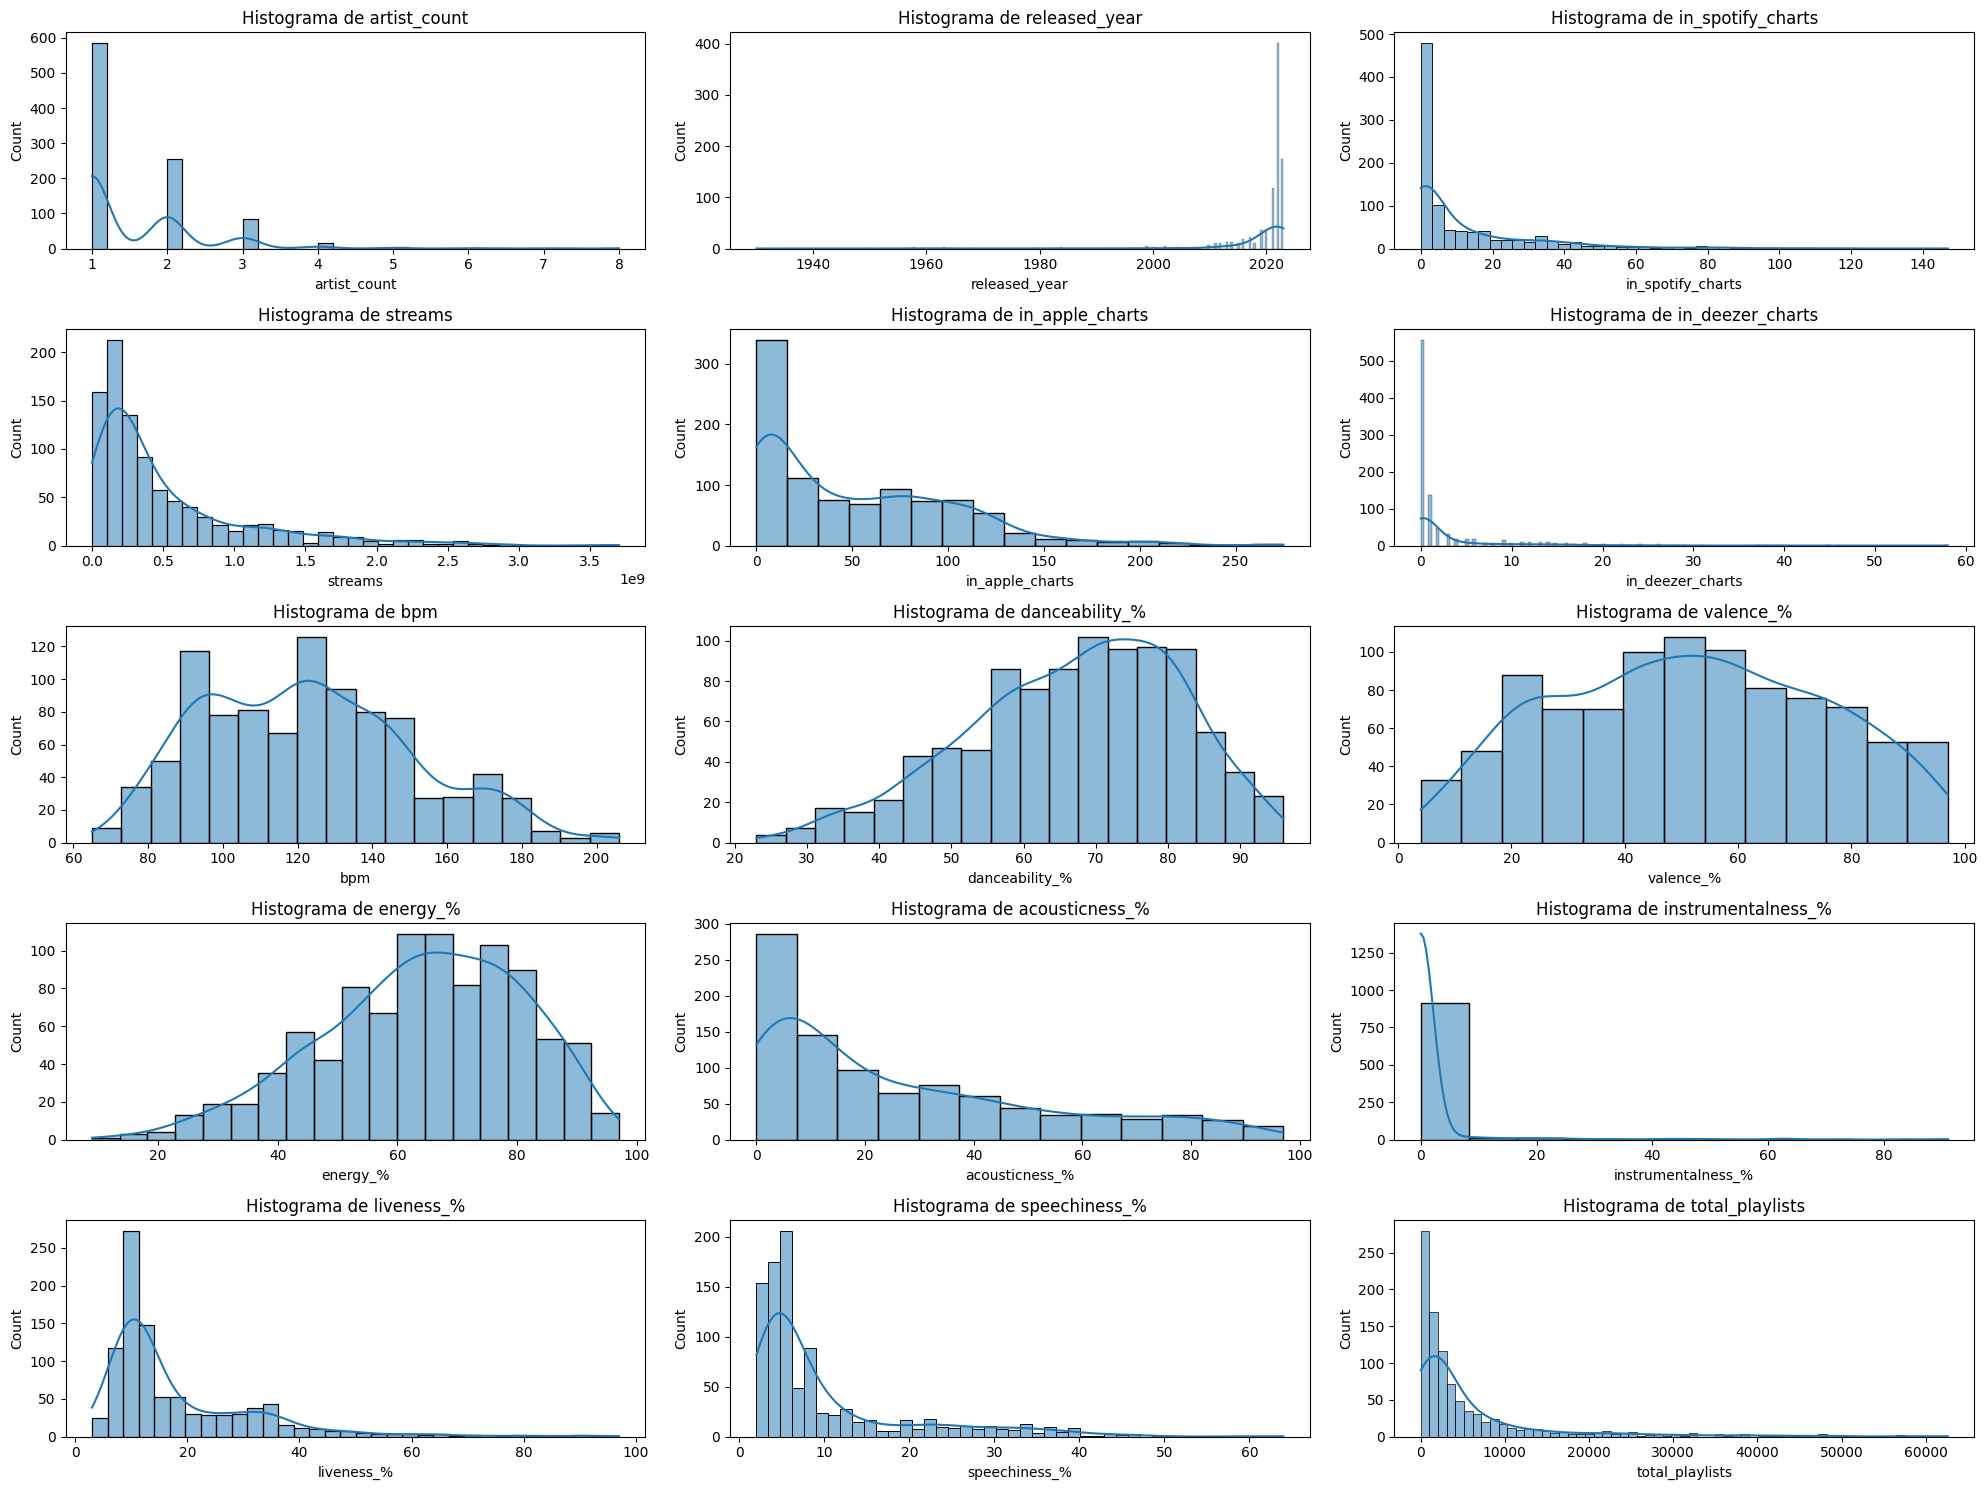

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Listar colunas numéricas
#numeric_columns = merged.select_dtypes(include=['int64', 'float64']).columns

# Listar colunas numéricas, excluindo 'streams'
numeric_columns = merged.select_dtypes(include=['int64', 'float64']).columns.tolist()
columns_of_interest = [col for col in numeric_columns if col != 'streams']

# Adicionar 'streams' às colunas de interesse
columns_of_interest.append('streams')
print(columns_of_interest)

# Plotar histogramas
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(merged[col], kde=True)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()


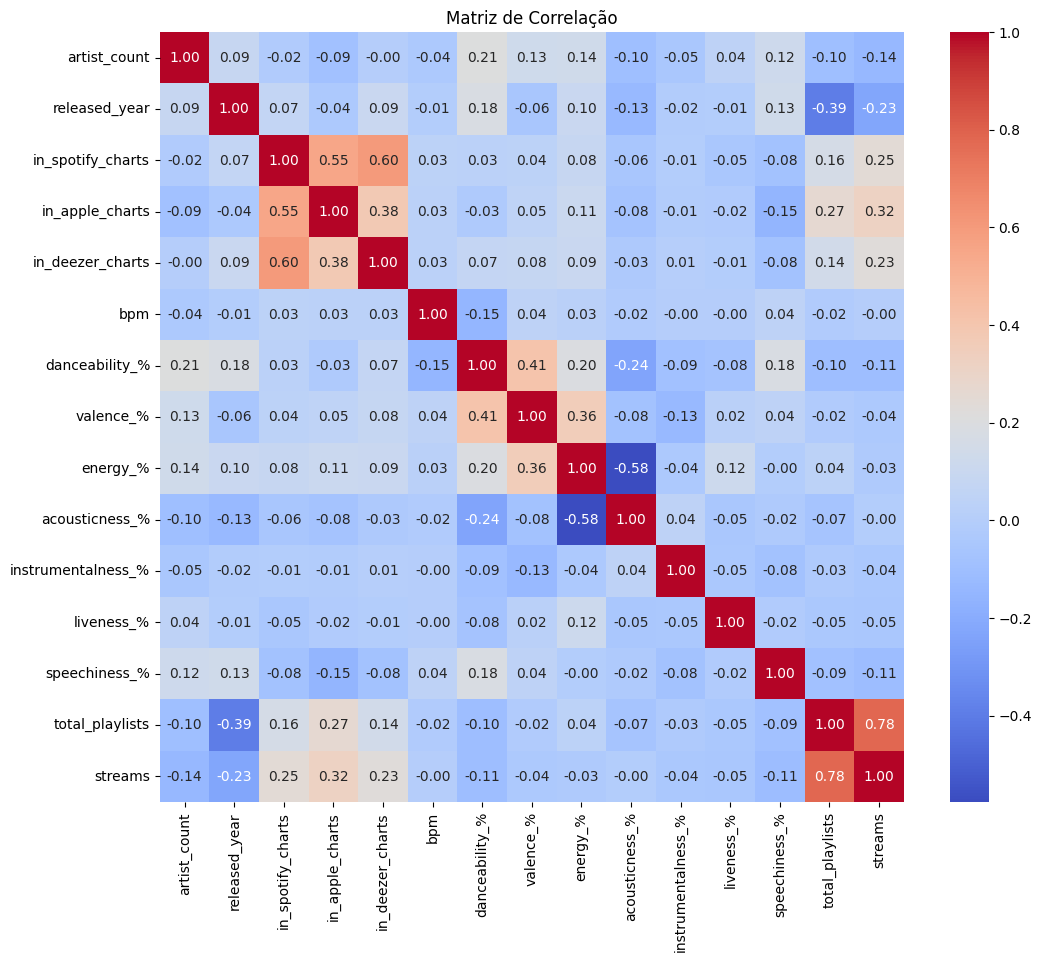

In [21]:
# Calcular a matriz de correlação
correlation_matrix = merged[columns_of_interest].corr()

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [22]:
# Salvar a matriz de correlação em um arquivo CSV
correlation_matrix.to_csv('correlation_matrix.csv')

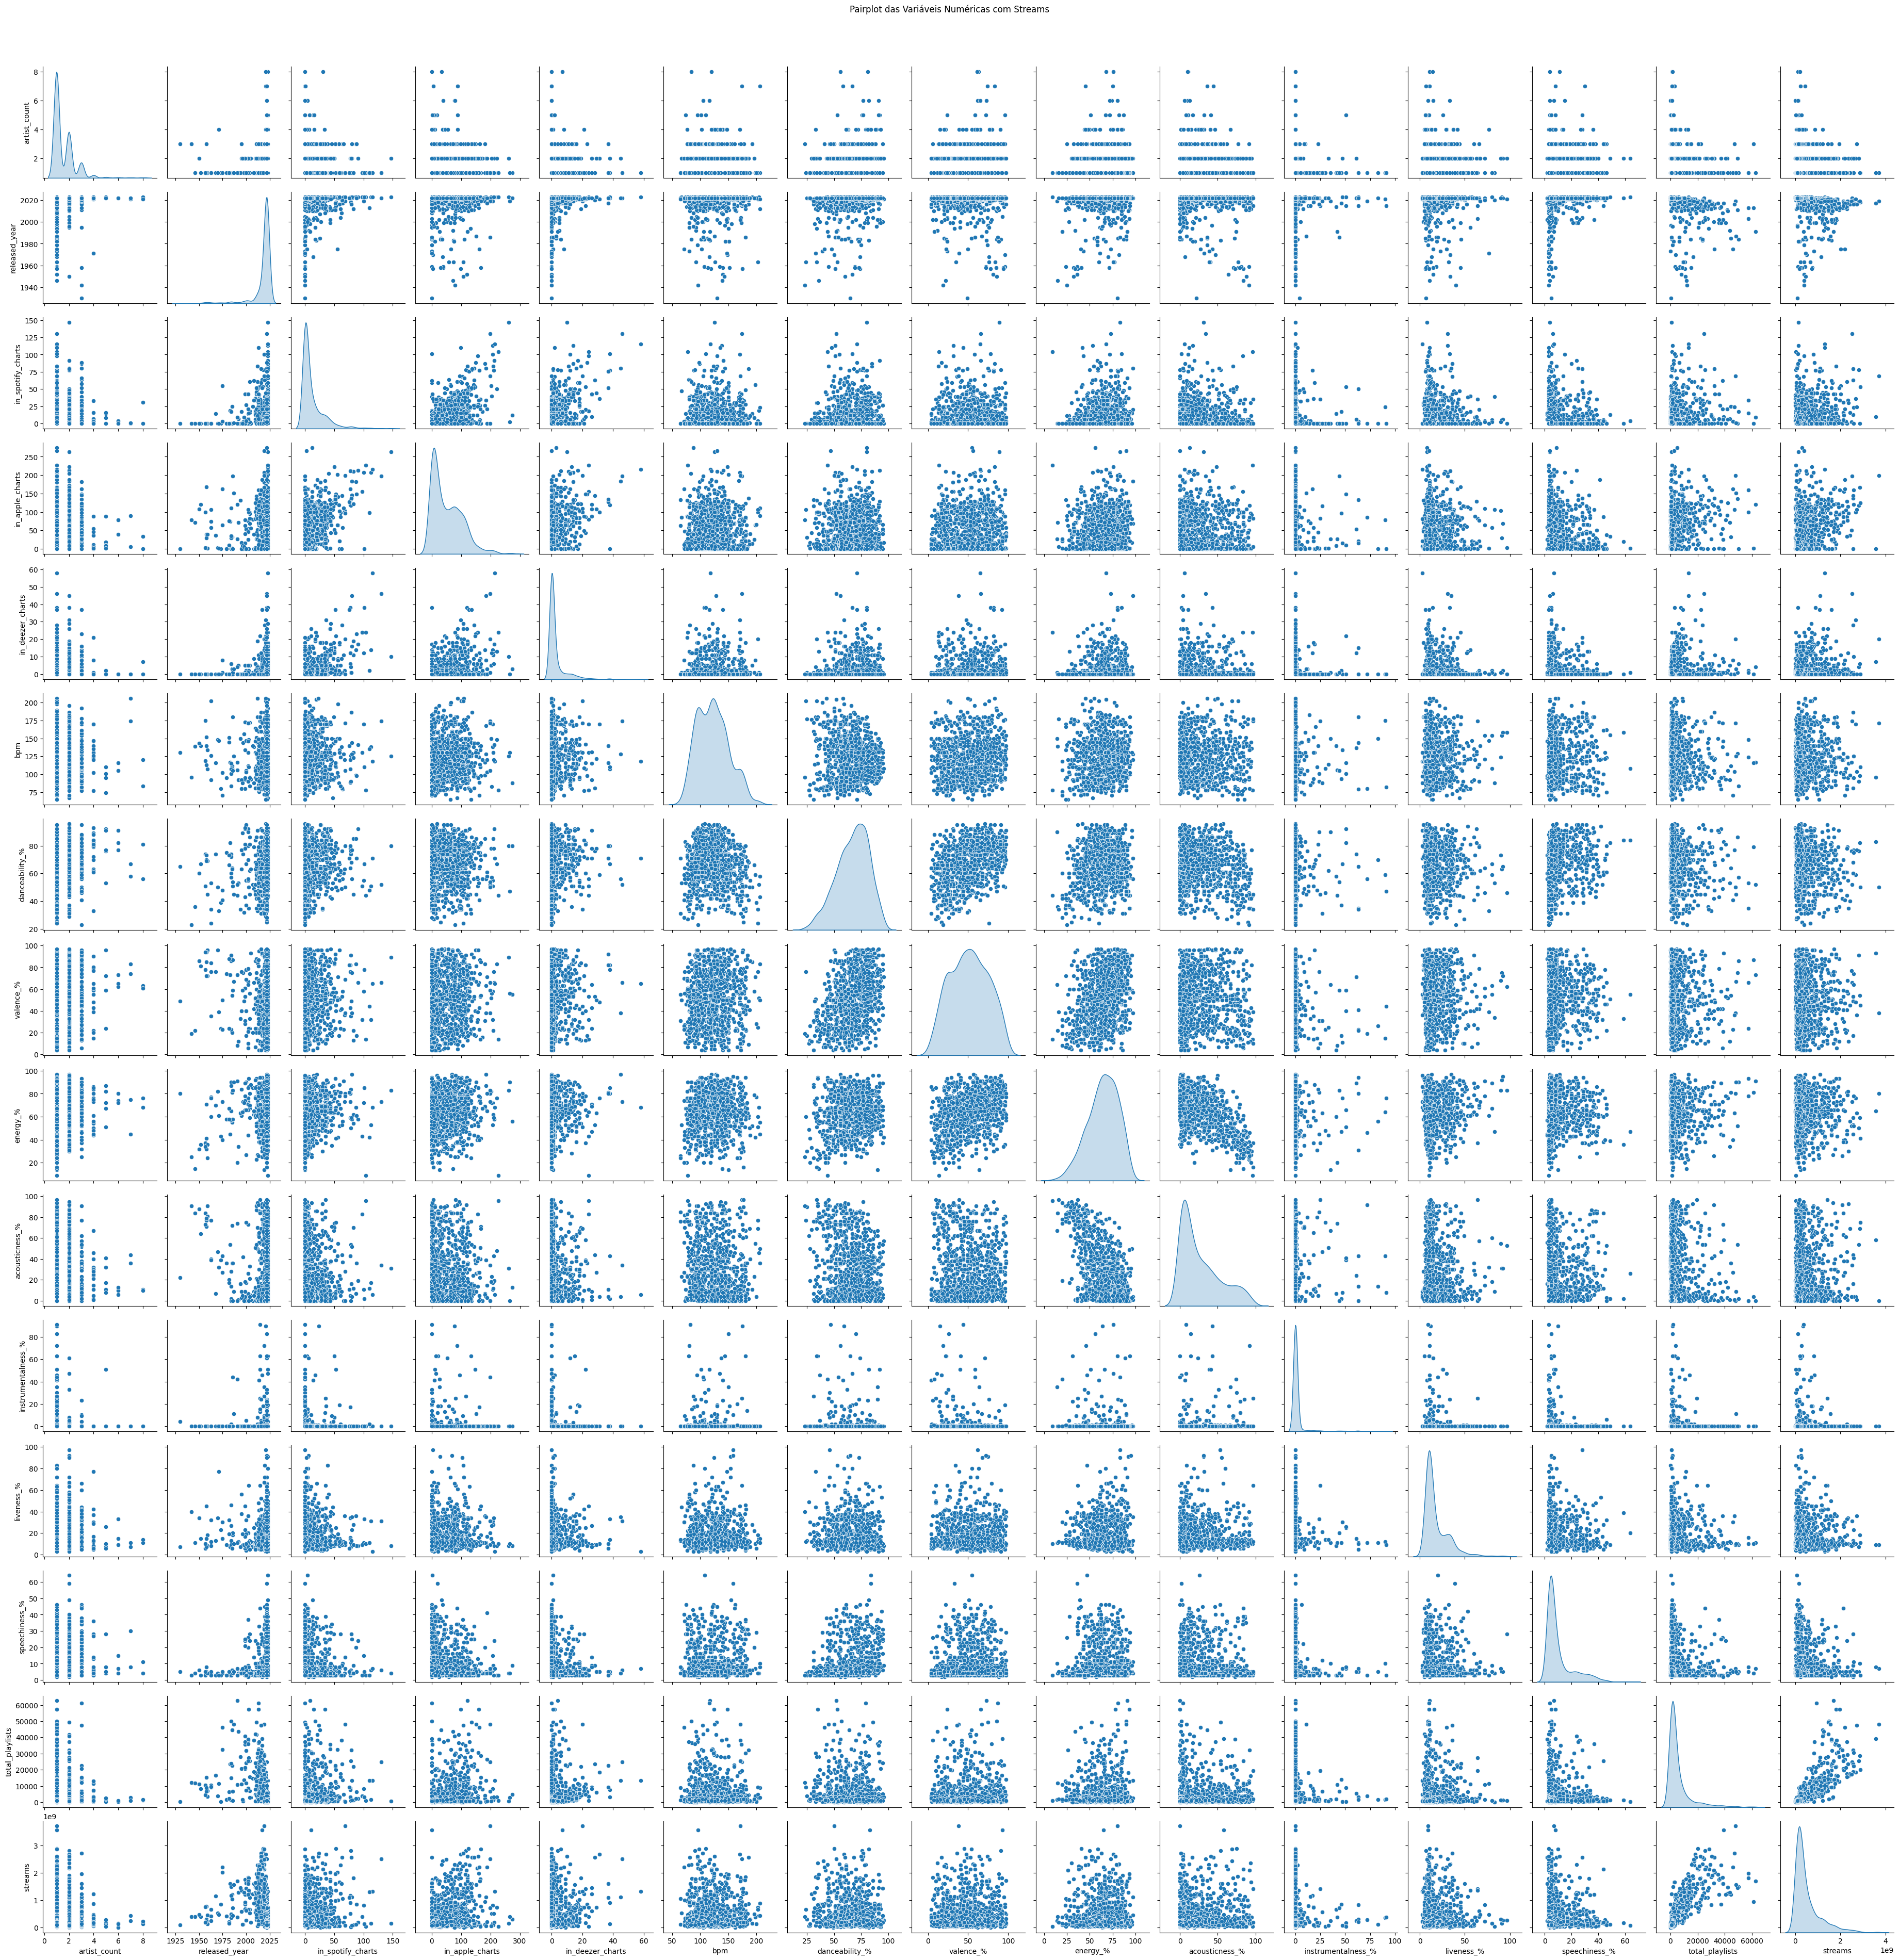

In [23]:
# Pairplot para variáveis numéricas com 'streams'
sns.pairplot(merged[columns_of_interest], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot das Variáveis Numéricas com Streams', y=1.02)
plt.show()

In [24]:
# Função para categorizar os dados
def categorize_column(merged, column_name):
    q1 = merged[column_name].quantile(0.25)
    q3 = merged[column_name].quantile(0.75)

    def categorize(value):
        if value <= q1:
            return 'low'
        elif value >= q3:
            return 'high'
        else:
            return 'medium'

    category_column = f'{column_name}_category'
    merged[category_column] = merged[column_name].apply(categorize)
    return merged

# Colunas a serem categorizadas
columns_to_categorize = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Aplicar a função a cada coluna
for column in columns_to_categorize:
    merged = categorize_column(merged, column)

# Verificar as novas colunas categorizadas
merged.head()

# Verificar a distribuição das categorias para cada nova coluna categorizada
for column in columns_to_categorize:
    category_column = f'{column}_category'
    print(merged[category_column].value_counts())


bpm_category
medium    476
low       238
high      238
Name: count, dtype: int64
danceability_%_category
medium    449
high      257
low       246
Name: count, dtype: int64
valence_%_category
medium    469
high      244
low       239
Name: count, dtype: int64
energy_%_category
medium    465
high      246
low       241
Name: count, dtype: int64
acousticness_%_category
medium    447
low       265
high      240
Name: count, dtype: int64
instrumentalness_%_category
low     865
high     87
Name: count, dtype: int64
liveness_%_category
medium    399
low       314
high      239
Name: count, dtype: int64
speechiness_%_category
medium    368
low       329
high      255
Name: count, dtype: int64


In [25]:
# Exportar o DataFrame processado para um arquivo CSV
merged.to_csv('spotify_2.0.csv')


In [26]:
df = pd.read_csv('spotify_2.0.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   952 non-null    int64 
 1   track_id                     952 non-null    object
 2   track_name                   952 non-null    object
 3   artist(s)_name               952 non-null    object
 4   artist_count                 952 non-null    int64 
 5   released_year                952 non-null    int64 
 6   in_spotify_charts            952 non-null    int64 
 7   streams                      952 non-null    int64 
 8   in_apple_charts              952 non-null    int64 
 9   in_deezer_charts             952 non-null    int64 
 10  bpm                          952 non-null    int64 
 11  danceability_%               952 non-null    int64 
 12  valence_%                    952 non-null    int64 
 13  energy_%                     952 no

In [28]:
corr = pd.read_csv('correlation_matrix.csv')
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15 non-null     object 
 1   artist_count        15 non-null     float64
 2   released_year       15 non-null     float64
 3   in_spotify_charts   15 non-null     float64
 4   in_apple_charts     15 non-null     float64
 5   in_deezer_charts    15 non-null     float64
 6   bpm                 15 non-null     float64
 7   danceability_%      15 non-null     float64
 8   valence_%           15 non-null     float64
 9   energy_%            15 non-null     float64
 10  acousticness_%      15 non-null     float64
 11  instrumentalness_%  15 non-null     float64
 12  liveness_%          15 non-null     float64
 13  speechiness_%       15 non-null     float64
 14  total_playlists     15 non-null     float64
 15  streams             15 non-null     float64
dtypes: float64